**Group members**

*   Nattapat Tangniyom   640631032
*   Sonram Sirirat       640631037
*   Thanakorn Chaisen 	 640631120

**Discuss the model result**

[Google Doc](https://docs.google.com/document/d/1_GkfR34xVttALH401G-ecejZvjPVLNy_yOOB5K-LcSI/edit?usp=sharing)

**Import Dataset**

In [ ]:
import pandas as pd
url = "https://raw.githubusercontent.com/SonramSirirat/everything-starts-with-data/main/Workshop_5/adult_pre.csv?raw=True"
df = pd.read_csv(url)
print(df)

       age          workclass  fnlwgt  ... hours.per.week  native.country  income
0       50   Self-emp-not-inc   83311  ...             13   United-States   <=50K
1       38            Private  215646  ...             40   United-States   <=50K
2       53            Private  234721  ...             40   United-States   <=50K
3       28            Private  338409  ...             40            Cuba   <=50K
4       37            Private  284582  ...             40   United-States   <=50K
...    ...                ...     ...  ...            ...             ...     ...
28209   22            Private  310152  ...             40   United-States   <=50K
28210   27            Private  257302  ...             38   United-States   <=50K
28211   40            Private  154374  ...             40   United-States    >50K
28212   58            Private  151910  ...             40   United-States   <=50K
28213   22            Private  201490  ...             20   United-States   <=50K

[28214 rows x 1

**Train Test Split**

In [ ]:
from sklearn.model_selection import train_test_split
X = df[["age","fnlwgt","education.num","sex.Female","sex.Male","capital.gain","capital.loss","hours.per.week"]]
y = df[["income"]]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=7)
print('Train Shape X: {} Y : {}'.format(X_train.shape,y_train.shape))
print('Test Shape X: {} Y : {}'.format(X_test.shape,y_test.shape))

Train Shape X: (22571, 8) Y : (22571, 1)
Test Shape X: (5643, 8) Y : (5643, 1)


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.neighbors import KNeighborsClassifier
n = 5
k = 0
acc = 0
for i in range(1,n+1):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train,y_train.values.ravel())
    answer = knn.predict(X_test)
    
    from sklearn.metrics import classification_report
    print('Report:', i)
    print(classification_report(y_test, answer))
    print('___________________________________________________________________')
    
    from sklearn.metrics import accuracy_score
    accore = accuracy_score(y_test, answer)
    from sklearn.metrics import confusion_matrix
    if acc < accore:
        k = i
        acc = accore

# Optimal k
print('Optimal k:', k)

Report: 1
              precision    recall  f1-score   support

       <=50K       0.84      0.82      0.83      4597
        >50K       0.28      0.31      0.29      1046

    accuracy                           0.72      5643
   macro avg       0.56      0.56      0.56      5643
weighted avg       0.73      0.72      0.73      5643

___________________________________________________________________
Report: 2
              precision    recall  f1-score   support

       <=50K       0.82      0.96      0.88      4597
        >50K       0.30      0.08      0.13      1046

    accuracy                           0.80      5643
   macro avg       0.56      0.52      0.51      5643
weighted avg       0.73      0.80      0.74      5643

___________________________________________________________________
Report: 3
              precision    recall  f1-score   support

       <=50K       0.83      0.90      0.86      4597
        >50K       0.27      0.16      0.20      1046

    accuracy    

**Otimal k with GridSearchCV**

In [ ]:
from sklearn.model_selection import GridSearchCV
parameters = {'n_neighbors': range(1,6)}
knn_best = GridSearchCV(knn, parameters, cv=5)
knn_best.fit(X_train,y_train.values.ravel())
knn_best.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

**Train VS Test accuracy**

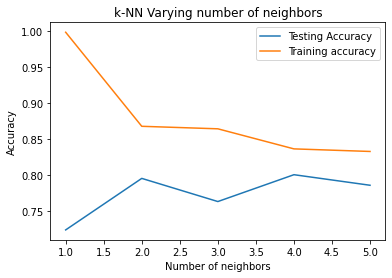

In [ ]:
neighbors = np.arange(1,6)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))
for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    #Fit the model 
    knn.fit(X_train, y_train.values.ravel()) 
    #Compute accuracy on the training set 
    train_accuracy[i] = knn.score(X_train, y_train) 
    #Compute accuracy on the test set 
    test_accuracy[i] = knn.score(X_test, y_test) 

plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

**Confusion matrix**

True Positive: 4320 False Positive: 277
True Negative: 933 False Negative: 113


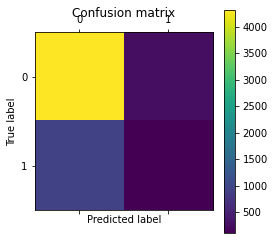

In [ ]:
# Compute confusion matrix
from sklearn import svm, datasets
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, answer)
print('True Positive: {} False Positive: {}'.format(cm[0][0],cm[0][1]))
print('True Negative: {} False Negative: {}'.format(cm[1][0],cm[1][1]))

# Show confusion matrix in a separate window
# import matplotlib.pyplot as plt
plt.matshow(cm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

**Cross Validation**

Validation score: [0.78671096 0.77868852 0.77691626 0.77536553 0.78090385]
Average score: 0.7797170265412736


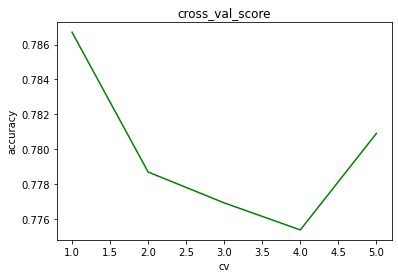

In [ ]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(knn, X_train,y_train.values.ravel(),cv=5,scoring='accuracy')
print('Validation score:', score)
avg = sum(score)/len(score)
print('Average score:', avg)

# import matplotlib.pyplot as plt
x = np.arange(1, 6)
plt.title("cross_val_score")
plt.xlabel("cv")
plt.ylabel("accuracy")
plt.plot(x, score, color ="green")
plt.show()